In [1]:
%matplotlib inline

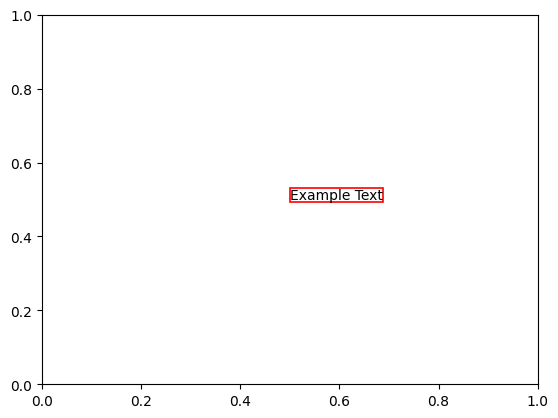

In [13]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle


def draw_bbox(text_obj, axes=None, color='red', linewidth=1.2):
    """
    Draw bounding box around a Matplotlib Text object.
    
    Parameters:
        text_obj: The Matplotlib Text object.
        color (optional): The color of the bounding box. Default is 'red'.
        linewidth (optional): The line width of the bounding box. Default is 1.2.
    
    Returns:
        rect: The Rectangle object representing the bounding box.
    """
    # Get the window extent of the text object
    
    bbox = text_obj.get_window_extent()
    axes = text_obj.axes if axes is None else axes
    # Transform the bounding box to the data coordinates of the current axis
    bbox_data = axes.transData.inverted().transform_bbox(bbox)

    # Create a Rectangle patch using the bounding box data coordinates
    rect = Rectangle((bbox_data.x0, bbox_data.y0),
                     bbox_data.width, bbox_data.height,
                     linewidth=linewidth, edgecolor=color, facecolor='none')

    # Add the Rectangle patch to the current axis
    axes.add_patch(rect)

    return rect


# Example usage
fig, ax = plt.subplots()

# Example text
text = ax.text(0.5, 0.5, 'Example Text', transform=ax.transAxes)

# Draw bounding box around the text
draw_bbox(text)

plt.show()


In [14]:
def _set_xlabel_bottom_left(ax, label):
    xlabel = ax.set_xlabel(label)

    # Get the bounding box of the xticklabels
    tt = ax.get_xticklabels()[0]
    print(tt)
    draw_bbox(tt, axes=ax)
    bbox = tt.get_window_extent()
    transform = ax.transAxes.inverted()

    # Get the y-position in the axes coordinate system
    y_bottom_in_ax = transform.transform((0, bbox.y0))[1]

    # Set the position of the x-label to the left of the axes and at the same height as the xticklabels
    xlabel.set_position((0, y_bottom_in_ax))


Text(0.0, 0, '0.0')


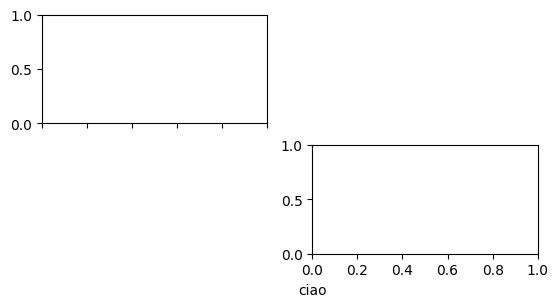

In [15]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

fig = plt.Figure()
gs = GridSpec(3, 2, fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 1], sharex=ax1)

for label in ax1.get_xticklabels():
    label.set_visible(False)
    
_set_xlabel_bottom_left(ax2, 'ciao')

fig



In [10]:
ax.get_xticklabels()[0].axes


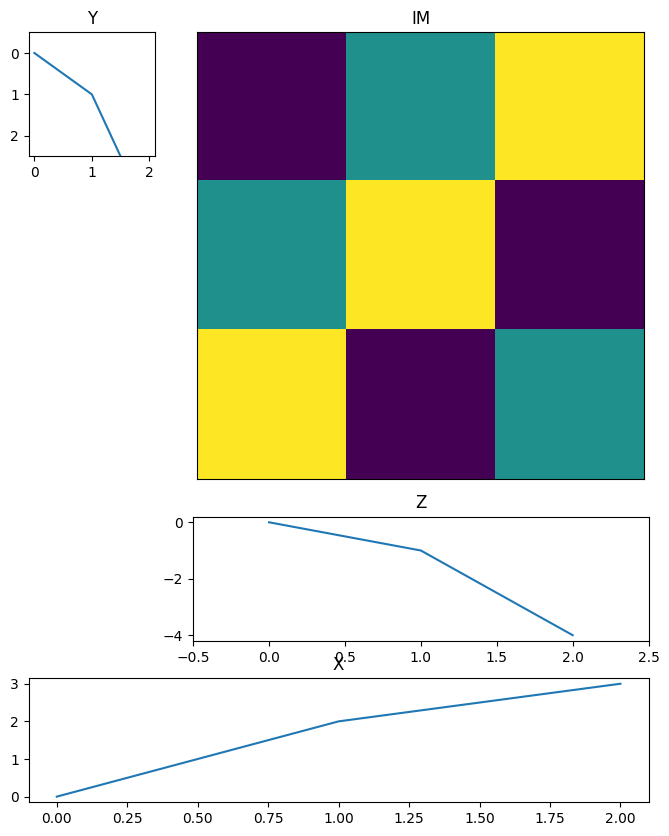

In [18]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Define the grid dimensions
num_rows = 5
num_cols = 4

# Set the height and width ratios to align axes
height_ratios = [1, 1, 1, 1, 1]  # IM has 3 parts, Z has 1, and X has 1
width_ratios = [1, 1, 1, 1]  # Y has 1 part (equal to Z height), IM+Z have 3

# Create a new figure with an explicitly set size
# The width should be 4 times the height of 'Z' (or 'Y') to keep 'IM' square.
fig = plt.figure(figsize=(8, 10))

# Create a GridSpec with the defined dimensions and ratios
gs = GridSpec(num_rows, num_cols, figure=fig, height_ratios=height_ratios, width_ratios=width_ratios)

# Create subplots
ax_y = fig.add_subplot(gs[0, 0])
ax_im = fig.add_subplot(gs[:3, 1:], sharey=ax_y)
ax_z = fig.add_subplot(gs[3, 1:], sharex=ax_im)
ax_x = fig.add_subplot(gs[4, :])

# Set aspect ratio of IM to be 1 (square)
ax_im.set_aspect('equal', adjustable='box')

# Example content
ax_y.plot([0, 1, 2], [0, 1, 4])
ax_y.set_title('Y')

ax_im.imshow([[1, 2, 3], [2, 3, 1], [3, 1, 2]])
ax_im.set_title('IM')

ax_z.plot([0, 1, 2], [0, -1, -4])
ax_z.set_title('Z')

ax_x.plot([0, 1, 2], [0, 2, 3])
ax_x.set_title('X')

# Hide x-axis labels for IM to avoid overlap with Z
ax_im.xaxis.set_visible(False)

# Hide y-axis labels for IM to avoid overlap with Y
ax_im.yaxis.set_visible(False)

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.show()
